#**Game** : *Rock / Paper / Scissors*


Description:

Experience the classic game of Rock-Paper-Scissors like never before with our cutting-edge AI opponent!

Step into the arena of digital strategy and quick thinking as you face off against a formidable artificial intelligence that learns and adapts to your every move.

```
RULES :
Rock && paper => paper wins
paper && scissor => scissor wins
Scissor && Rock => Rock wins

if both are same then it will be tie ( No one get points)
```



In [ ]:
print("Hello world ")

Hello world 


In [1]:
# import the Dataset from G-Drive
! gdown --id 1F-HQgGwZ8swEVSBapyHWoZIYRvDBjOM7

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1F-HQgGwZ8swEVSBapyHWoZIYRvDBjOM7
To: /content/Rock-Paper-Scissors.zip
100% 237M/237M [00:06<00:00, 39.4MB/s]


In [2]:
# Dataset is in .zip file. so unzip it
import zipfile
zip_ref = zipfile.ZipFile('/content/Rock-Paper-Scissors.zip', 'r')
zip_ref.extractall('/content') # Destination
zip_ref.close()

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
# Data Loading and Preprocessing:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for train and test data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to [0, 1]
    rotation_range=20,  #  random rotation
    width_shift_range=0.2,  #  horizontal shift
    height_shift_range=0.2,  #  vertical shift
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for test data

# Define batch size and target image size
batch_size = 32
img_size = 300

# Create data generators
train_generator = train_datagen.flow_from_directory(
    '/content/Rock-Paper-Scissors/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/Rock-Paper-Scissors/test',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output for the dense layers
model.add(Flatten())

# Dense (fully connected) layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(3, activation='softmax'))  # 3 output classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [7]:
history = model.fit(train_generator, # from tain folder
                    epochs=7,
                    validation_data=test_generator) # from test folder


Epoch 1/7
79/79 [==============================] - 80s 842ms/step - loss: 1.4371 - accuracy: 0.4413 - val_loss: 0.7338 - val_accuracy: 0.7339
Epoch 2/7
79/79 [==============================] - 63s 800ms/step - loss: 0.6817 - accuracy: 0.7250 - val_loss: 0.6377 - val_accuracy: 0.6559
Epoch 3/7
79/79 [==============================] - 62s 782ms/step - loss: 0.5766 - accuracy: 0.7663 - val_loss: 0.3586 - val_accuracy: 0.9624
Epoch 4/7
79/79 [==============================] - 64s 809ms/step - loss: 0.4486 - accuracy: 0.8282 - val_loss: 0.2359 - val_accuracy: 0.9758
Epoch 5/7
79/79 [==============================] - 64s 808ms/step - loss: 0.3845 - accuracy: 0.8540 - val_loss: 0.1518 - val_accuracy: 0.9516
Epoch 6/7
79/79 [==============================] - 64s 805ms/step - loss: 0.3163 - accuracy: 0.8972 - val_loss: 0.1562 - val_accuracy: 0.9570
Epoch 7/7
79/79 [==============================] - 64s 812ms/step - loss: 0.2740 - accuracy: 0.9016 - val_loss: 0.2071 - val_accuracy: 0.9462


In [8]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

12/12 [==============================] - 2s 159ms/step - loss: 0.2071 - accuracy: 0.9462
Test loss: 0.20705968141555786
Test accuracy: 0.9462365508079529


In [9]:
# if want to save model
model.save('GameModel.h5')

# Model trained successfully, now start testing

`JUst a smaple test predict`

In [10]:
path = '/content/Rock-Paper-Scissors/validation/rock1.png'

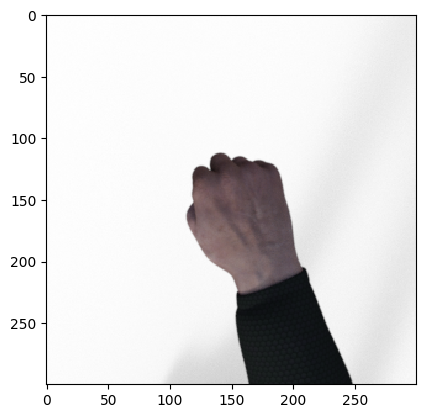

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
img = image.load_img(path, target_size=(img_size, img_size))
plt.imshow(img, interpolation='nearest')
plt.show()

In [12]:
img_array = np.array(img).reshape(1,300,300,3)
img_array.shape

(1, 300, 300, 3)

In [13]:
a = model.predict(img_array)
print(a)
user_choice = a.tolist()[0]
print(user_choice)

1/1 [==============================] - 0s 295ms/step
[[0. 1. 0.]]
[0.0, 1.0, 0.0]


`User has successfully select a option`
1. Paper
2. Rock
3. Scissors

`Mechine start to pick a option`





In [14]:
import random

def random_choice():
    options = [[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]]
    return random.choice(options)
# [1., 0., 0.] => Paper
# [0., 1., 0.] => Rock
# [0., 0., 1.] => Scissor

mechine_choice = random_choice()
print(mechine_choice)


[0.0, 1.0, 0.0]


`Mechine picked a choice`

In [15]:
# Geme logic functions

score = { # for storing score of each time
    "User" : 0,
    "Machine" : 0
}

def game_logic(user, machine):
    # using dictionary to check the conditons
    outcomes = {
        ((1.0, 0.0, 0.0), (0.0, 0.0, 1.0)): "User",
        ((0.0, 1.0, 0.0), (1.0, 0.0, 0.0)): "User",
        ((0.0, 0.0, 1.0), (0.0, 1.0, 0.0)): "User",
    }
    if machine == user:
        return "Tie, no one wins"
    who_wins = outcomes.get((tuple(machine), tuple(user)), "Machine")
    score[who_wins] += 1
    return who_wins + " is the winner"


def which_option(choice):
    options = {
        (1.0, 0.0, 0.0): "Paper",
        (0.0, 1.0, 0.0): "Rock",
        (0.0, 0.0, 1.0): "Scissors"
    }
    return options.get(tuple(choice), "Invalid Choice")


def game_result():    # function to print result
    print("\n")
    print("USER : " + which_option(user_choice))
    print("MECHINE : "+ which_option(mechine_choice))
    print("\t")
    print("=>>  " + game_logic(user_choice, mechine_choice))


# function to replay the game. better to change Gesture
def replay(newpath):
  img = image.load_img(newpath, target_size=(img_size, img_size))
  # plt.imshow(img, interpolation='nearest')
  # plt.show()
  img_array = np.array(img).reshape(1,300,300,3)
  a = model.predict(img_array)
  global user_choice, mechine_choice
  user_choice = a.tolist()[0]       # user choice assigned
  mechine_choice = random_choice()  # mechine choice assigned
  # print(user_choice)
  # print(mechine_choice)
  game_result()


# function to show the points between User and mechine
def point_system():
    print("\n--------------------")
    print("User\t|  Machine")
    print("--------------------")
    print("  " + str(score["User"]) + "\t    " + str(score["Machine"]))
    print("\n")

<br>

# Only for first play

In [16]:
game_result()



USER : Rock
MECHINE : Rock
	
=>>  Tie, no one wins



<br><hr>
# IF YOU WANT OT PLAY AGAIN, RUN THE CELL BELLOW  


1/1 [==============================] - 0s 44ms/step


USER : Scissors
MECHINE : Scissors
	
=>>  Tie, no one wins

--------------------
User	|  Machine
--------------------
  0	    0




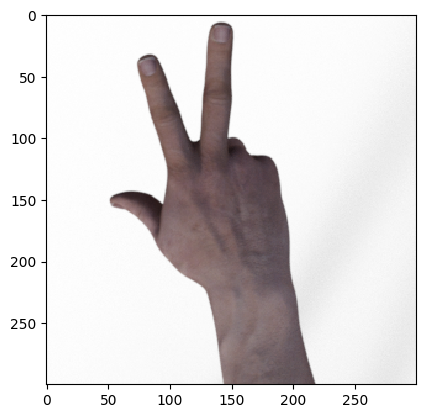

In [17]:
path = "/content/Rock-Paper-Scissors/validation/scissors2.png" # add new image path

replay(path)
point_system()


img = image.load_img(path, target_size=(img_size, img_size))
plt.imshow(img, interpolation='nearest')
plt.show()